In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
data=pd.read_excel("KAtracecovid date count .xlsx")

In [3]:
data.head()

,date,count
0,2020-03-09,1
1,2020-03-10,2
2,2020-03-11,1
3,2020-03-12,1
4,2020-03-13,1


In [4]:
data.head()


,date,count
0,2020-03-09,1
1,2020-03-10,2
2,2020-03-11,1
3,2020-03-12,1
4,2020-03-13,1


In [5]:
train_data=data.iloc[0:125,1]
train_data
test_data=data.iloc[125:135,1]
test_data

125    2627
126    2738
127    2501
128    3178
129    4169
130    3685
131    4537
132    4120
133    3648
134    3649
Name: count, dtype: int64

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [7]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [8]:
timeseries_data = train_data
timeseries_data
n_steps = 10
X, y = prepare_data(timeseries_data, n_steps)



In [9]:
print(X),print(y)
len(y)

[[   1    2    1 ...    0    4    3]
 [   2    1    1 ...    4    3    1]
 [   1    1    1 ...    3    1    0]
 ...
 [1105  947 1272 ... 1843 1498 2062]
 [ 947 1272 1502 ... 1498 2062 2228]
 [1272 1502 1694 ... 2062 2228 2313]]
[   1    0    5    5    8    8   10    4    9   12    7    5   13    9
   14    4   16    7   12   12    6   16   10    8   17   15   13   19
   36   44   25    6   18   10    9   18   29   26    3    9   11   11
   31   24   12   13   37   22   20   12   48   41   54   14   63   34
   28   69   36   55   99  149   67  143  138  216  130   93  101  135
  115  248  141  299  187  388  267  257  515  378  239  308  161  120
  204  271  308  176  213  317  204  210  337  416  453  249  322  397
  442  445  918 1267 1105  947 1272 1502 1694 1839 1925 1843 1498 2062
 2228 2313 2798]


115

In [10]:
X.shape

(115, 10)

In [11]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
X.shape

(115, 10, 1)

### Building LSTM Model

Epoch 1/1000
4/4 [==============================] - 7s 49ms/step - loss: 264809.4031
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 240943.5312
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 247412.5781
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 234751.1281
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 199030.6406
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 157921.5063
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 111978.4688
Epoch 8/1000
4/4 [==============================] - 0s 12ms/step - loss: 62927.4695
Epoch 9/1000
4/4 [==============================] - 0s 14ms/step - loss: 43759.7469
Epoch 10/1000
4/4 [==============================] - 0s 13ms/step - loss: 37348.9391
Epoch 11/1000
4/4 [==============================] - 0s 15ms/step - loss: 31423.6309
Epoch 12/1000
4/4 [==============================] - 0s 14ms/step -

4/4 [==============================] - 0s 12ms/step - loss: 5497.3701
Epoch 98/1000
4/4 [==============================] - 0s 12ms/step - loss: 3413.6421
Epoch 99/1000
4/4 [==============================] - 0s 15ms/step - loss: 4394.5363
Epoch 100/1000
4/4 [==============================] - 0s 13ms/step - loss: 3958.1092
Epoch 101/1000
4/4 [==============================] - 0s 12ms/step - loss: 4295.0409
Epoch 102/1000
4/4 [==============================] - 0s 11ms/step - loss: 4052.1155
Epoch 103/1000
4/4 [==============================] - 0s 14ms/step - loss: 3574.4316
Epoch 104/1000
4/4 [==============================] - 0s 13ms/step - loss: 3496.7896
Epoch 105/1000
4/4 [==============================] - 0s 11ms/step - loss: 3287.9589
Epoch 106/1000
4/4 [==============================] - 0s 13ms/step - loss: 3006.7166
Epoch 107/1000
4/4 [==============================] - 0s 11ms/step - loss: 3595.0993
Epoch 108/1000
4/4 [==============================] - 0s 12ms/step - loss: 3420.01

4/4 [==============================] - 0s 11ms/step - loss: 16473.6633
Epoch 193/1000
4/4 [==============================] - 0s 14ms/step - loss: 19930.8828
Epoch 194/1000
4/4 [==============================] - 0s 12ms/step - loss: 14987.9391
Epoch 195/1000
4/4 [==============================] - 0s 13ms/step - loss: 16661.3170
Epoch 196/1000
4/4 [==============================] - 0s 11ms/step - loss: 10879.3738
Epoch 197/1000
4/4 [==============================] - 0s 12ms/step - loss: 13592.0834
Epoch 198/1000
4/4 [==============================] - 0s 14ms/step - loss: 10894.7045
Epoch 199/1000
4/4 [==============================] - 0s 13ms/step - loss: 14727.6051
Epoch 200/1000
4/4 [==============================] - 0s 15ms/step - loss: 18391.4434
Epoch 201/1000
4/4 [==============================] - 0s 12ms/step - loss: 12981.6521
Epoch 202/1000
4/4 [==============================] - 0s 12ms/step - loss: 14093.1055
Epoch 203/1000
4/4 [==============================] - 0s 12ms/step - 

4/4 [==============================] - 0s 12ms/step - loss: 24203.5750
Epoch 288/1000
4/4 [==============================] - 0s 11ms/step - loss: 19660.2157
Epoch 289/1000
4/4 [==============================] - 0s 12ms/step - loss: 27404.5578
Epoch 290/1000
4/4 [==============================] - 0s 15ms/step - loss: 17988.2248
Epoch 291/1000
4/4 [==============================] - 0s 12ms/step - loss: 23383.6500
Epoch 292/1000
4/4 [==============================] - 0s 13ms/step - loss: 26367.6828
Epoch 293/1000
4/4 [==============================] - 0s 13ms/step - loss: 21598.9906
Epoch 294/1000
4/4 [==============================] - 0s 13ms/step - loss: 25754.7309
Epoch 295/1000
4/4 [==============================] - 0s 11ms/step - loss: 25304.2023
Epoch 296/1000
4/4 [==============================] - 0s 13ms/step - loss: 23068.7586
Epoch 297/1000
4/4 [==============================] - 0s 13ms/step - loss: 24660.6090
Epoch 298/1000
4/4 [==============================] - 0s 11ms/step - 

4/4 [==============================] - 0s 11ms/step - loss: 13402.0707
Epoch 383/1000
4/4 [==============================] - 0s 11ms/step - loss: 14705.8930
Epoch 384/1000
4/4 [==============================] - 0s 12ms/step - loss: 9692.3440
Epoch 385/1000
4/4 [==============================] - 0s 12ms/step - loss: 13826.0400
Epoch 386/1000
4/4 [==============================] - 0s 12ms/step - loss: 12397.6514
Epoch 387/1000
4/4 [==============================] - 0s 12ms/step - loss: 11937.5375
Epoch 388/1000
4/4 [==============================] - 0s 12ms/step - loss: 11302.7326
Epoch 389/1000
4/4 [==============================] - 0s 13ms/step - loss: 15422.7107
Epoch 390/1000
4/4 [==============================] - 0s 12ms/step - loss: 10096.8029
Epoch 391/1000
4/4 [==============================] - 0s 12ms/step - loss: 10687.3293
Epoch 392/1000
4/4 [==============================] - 0s 12ms/step - loss: 11722.5092
Epoch 393/1000
4/4 [==============================] - 0s 13ms/step - l

4/4 [==============================] - 0s 13ms/step - loss: 6947.4031
Epoch 479/1000
4/4 [==============================] - 0s 13ms/step - loss: 5886.0574
Epoch 480/1000
4/4 [==============================] - 0s 13ms/step - loss: 6209.0435
Epoch 481/1000
4/4 [==============================] - 0s 13ms/step - loss: 6994.4892
Epoch 482/1000
4/4 [==============================] - 0s 13ms/step - loss: 4878.8940
Epoch 483/1000
4/4 [==============================] - 0s 13ms/step - loss: 6731.5083
Epoch 484/1000
4/4 [==============================] - 0s 14ms/step - loss: 7409.4244
Epoch 485/1000
4/4 [==============================] - 0s 15ms/step - loss: 8407.6962
Epoch 486/1000
4/4 [==============================] - 0s 12ms/step - loss: 5752.1132
Epoch 487/1000
4/4 [==============================] - 0s 13ms/step - loss: 7532.6523
Epoch 488/1000
4/4 [==============================] - 0s 11ms/step - loss: 6353.1548
Epoch 489/1000
4/4 [==============================] - 0s 14ms/step - loss: 5279.

4/4 [==============================] - 0s 11ms/step - loss: 10784.5426
Epoch 575/1000
4/4 [==============================] - 0s 12ms/step - loss: 13614.8568
Epoch 576/1000
4/4 [==============================] - 0s 14ms/step - loss: 10429.6516
Epoch 577/1000
4/4 [==============================] - 0s 14ms/step - loss: 7261.7879
Epoch 578/1000
4/4 [==============================] - 0s 11ms/step - loss: 6576.1900
Epoch 579/1000
4/4 [==============================] - 0s 13ms/step - loss: 9172.4396
Epoch 580/1000
4/4 [==============================] - 0s 12ms/step - loss: 8164.6584
Epoch 581/1000
4/4 [==============================] - 0s 13ms/step - loss: 8089.7031
Epoch 582/1000
4/4 [==============================] - 0s 12ms/step - loss: 7326.1856
Epoch 583/1000
4/4 [==============================] - 0s 12ms/step - loss: 5848.6983
Epoch 584/1000
4/4 [==============================] - 0s 12ms/step - loss: 8106.1899
Epoch 585/1000
4/4 [==============================] - 0s 11ms/step - loss: 77

4/4 [==============================] - 0s 12ms/step - loss: 1526.3439
Epoch 671/1000
4/4 [==============================] - 0s 12ms/step - loss: 1356.6541
Epoch 672/1000
4/4 [==============================] - 0s 12ms/step - loss: 1371.6377
Epoch 673/1000
4/4 [==============================] - 0s 14ms/step - loss: 2033.5241
Epoch 674/1000
4/4 [==============================] - 0s 11ms/step - loss: 1843.2444
Epoch 675/1000
4/4 [==============================] - 0s 10ms/step - loss: 1772.1881
Epoch 676/1000
4/4 [==============================] - 0s 13ms/step - loss: 1501.8108
Epoch 677/1000
4/4 [==============================] - 0s 14ms/step - loss: 1394.1558
Epoch 678/1000
4/4 [==============================] - 0s 11ms/step - loss: 1328.0288
Epoch 679/1000
4/4 [==============================] - 0s 13ms/step - loss: 1001.8618
Epoch 680/1000
4/4 [==============================] - 0s 12ms/step - loss: 937.4107
Epoch 681/1000
4/4 [==============================] - 0s 11ms/step - loss: 1044.1

4/4 [==============================] - 0s 12ms/step - loss: 106021.9109
Epoch 768/1000
4/4 [==============================] - 0s 11ms/step - loss: 79905.2406
Epoch 769/1000
4/4 [==============================] - 0s 11ms/step - loss: 104046.0148
Epoch 770/1000
4/4 [==============================] - 0s 11ms/step - loss: 185383.0609
Epoch 771/1000
4/4 [==============================] - 0s 13ms/step - loss: 67896.2664
Epoch 772/1000
4/4 [==============================] - 0s 11ms/step - loss: 268783.5250
Epoch 773/1000
4/4 [==============================] - 0s 11ms/step - loss: 121567.4867
Epoch 774/1000
4/4 [==============================] - 0s 11ms/step - loss: 88195.6523
Epoch 775/1000
4/4 [==============================] - 0s 11ms/step - loss: 130243.5844
Epoch 776/1000
4/4 [==============================] - 0s 13ms/step - loss: 163905.5375
Epoch 777/1000
4/4 [==============================] - 0s 13ms/step - loss: 50439.5312
Epoch 778/1000
4/4 [==============================] - 0s 13ms/

4/4 [==============================] - 0s 13ms/step - loss: 27642.8211
Epoch 863/1000
4/4 [==============================] - 0s 11ms/step - loss: 34270.0383
Epoch 864/1000
4/4 [==============================] - 0s 12ms/step - loss: 25292.1195
Epoch 865/1000
4/4 [==============================] - 0s 11ms/step - loss: 23814.8527
Epoch 866/1000
4/4 [==============================] - 0s 11ms/step - loss: 17599.6391
Epoch 867/1000
4/4 [==============================] - 0s 11ms/step - loss: 21983.2578
Epoch 868/1000
4/4 [==============================] - 0s 13ms/step - loss: 24936.0375
Epoch 869/1000
4/4 [==============================] - 0s 13ms/step - loss: 16825.0832
Epoch 870/1000
4/4 [==============================] - 0s 12ms/step - loss: 13921.5380
Epoch 871/1000
4/4 [==============================] - 0s 11ms/step - loss: 16358.4305
Epoch 872/1000
4/4 [==============================] - 0s 13ms/step - loss: 19273.0000
Epoch 873/1000
4/4 [==============================] - 0s 12ms/step - 

4/4 [==============================] - 0s 11ms/step - loss: 22803.4609
Epoch 958/1000
4/4 [==============================] - 0s 11ms/step - loss: 21199.6756
Epoch 959/1000
4/4 [==============================] - 0s 12ms/step - loss: 22488.1646
Epoch 960/1000
4/4 [==============================] - 0s 13ms/step - loss: 18998.5105
Epoch 961/1000
4/4 [==============================] - 0s 14ms/step - loss: 22154.8914
Epoch 962/1000
4/4 [==============================] - 0s 11ms/step - loss: 20661.6191
Epoch 963/1000
4/4 [==============================] - 0s 13ms/step - loss: 19497.4197
Epoch 964/1000
4/4 [==============================] - 0s 10ms/step - loss: 14974.3447
Epoch 965/1000
4/4 [==============================] - 0s 11ms/step - loss: 26393.8793
Epoch 966/1000
4/4 [==============================] - 0s 12ms/step - loss: 22343.7188
Epoch 967/1000
4/4 [==============================] - 0s 11ms/step - loss: 21926.7336
Epoch 968/1000
4/4 [==============================] - 0s 11ms/step - 

Text(0, 0.5, 'loss')

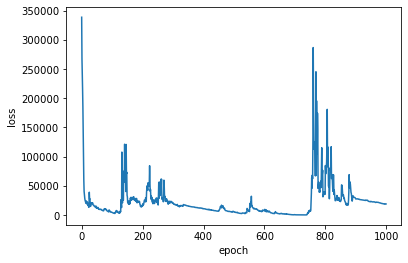

In [13]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=1000, verbose=1)
pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.xlabel('epoch')
pyplot.ylabel('loss')


### Predicting For the next 10 data

In [14]:

last10=train_data.iloc[-11:-1]
len(last10)



10

In [15]:

x_input = np.array(last10)
temp_input=list(x_input)
pred_data=[]
i=0
while(i<10):
    
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        pred_data.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        pred_data.append(yhat[0][0])
        i=i+1
    

print(pred_data)

[2717.3145]
1 day input [1502.         1694.         1839.         1925.         1843.
 1498.         2062.         2228.         2313.         2717.31445312]
1 day output [[3277.3884]]
2 day input [1694.         1839.         1925.         1843.         1498.
 2062.         2228.         2313.         2717.31445312 3277.38842773]
2 day output [[3271.1443]]
3 day input [1839.         1925.         1843.         1498.         2062.
 2228.         2313.         2717.31445312 3277.38842773 3271.14428711]
3 day output [[3623.3853]]
4 day input [1925.         1843.         1498.         2062.         2228.
 2313.         2717.31445312 3277.38842773 3271.14428711 3623.38525391]
4 day output [[3867.5334]]
5 day input [1843.         1498.         2062.         2228.         2313.
 2717.31445312 3277.38842773 3271.14428711 3623.38525391 3867.53344727]
5 day output [[4154.7114]]
6 day input [1498.         2062.         2228.         2313.         2717.31445312
 3277.38842773 3271.14428711 3623.3

In [16]:
len(timeseries_data)

125

In [17]:
pred_data

[2717.3145,
 3277.3884,
 3271.1443,
 3623.3853,
 3867.5334,
 4154.7114,
 4400.2407,
 4994.0513,
 5526.7676,
 6141.4478]

In [18]:
len(pred_data)

10

### Visualizaing The Output

In [19]:
import matplotlib.pyplot as plt

In [20]:
day_new=np.arange(1,126)
day_pred=np.arange(126,136)
day_act=np.arange(126,136)



In [21]:
day_new
test_data
day_act

array([126, 127, 128, 129, 130, 131, 132, 133, 134, 135])

Text(0, 0.5, 'patients')

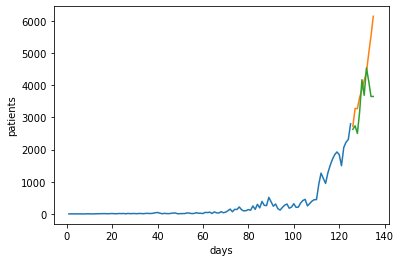

In [22]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,pred_data)
plt.plot(day_act,test_data)
pyplot.xlabel('days')
pyplot.ylabel('patients')

In [23]:
#test_data = data.iloc[0:135,1]
#day_act=np.arange(1,136)
#plt.plot(day_act,test_data)

In [24]:
print(test_data)
#print(pred_data)

125    2627
126    2738
127    2501
128    3178
129    4169
130    3685
131    4537
132    4120
133    3648
134    3649
Name: count, dtype: int64


In [37]:
#print(test_data)
#print(pred_data)
diff=test_data-pred_data

abs_diff=abs(diff)
MAPE = np.mean(abs_diff/test_data)*100
MAPE

23.195924546733295

In [36]:
MAPE

23.195924546733295

In [34]:
print(test_data)
print(pred_data)

125    2627
126    2738
127    2501
128    3178
129    4169
130    3685
131    4537
132    4120
133    3648
134    3649
Name: count, dtype: int64
[2717.3145, 3277.3884, 3271.1443, 3623.3853, 3867.5334, 4154.7114, 4400.2407, 4994.0513, 5526.7676, 6141.4478]
